In [1]:
import pandas as pd

data = pd.read_pickle('trojans_dataset.pkl')

In [158]:
import numpy as np

#### Features importantes para serem estudadas mais a frente #####
#    static.pe.pe_sections, vt.json                              #
#----------------------------------------------------------------#

data_fil = data.filter(items=['cr32',
                              'exiftool.EXE-OSVersion',
                              'exiftool.EXE-LinkerVersion',
                              'static.pe.imported_dll_count',
                              'static.pe.pe_timestamp',
                              'vt.positives',
                              'vt.modified_at.$date',                              
                              'exiftool.EXE-AssemblyVersion',
                              'exiftool.EXE-CodeSize',
                              'exiftool.EXE-FileSubtype',
                              'exiftool.EXE-FileVersionNumber',
                              'exiftool.EXE-ImageVersion',
                              'exiftool.EXE-InitializedDataSize',
                              'exiftool.EXE-ProductVersionNumber',
                              'exiftool.EXE-TimeStamp',
                              'exiftool.EXE-UninitializedDataSize',
                              'exiftool.File-FileSize',
                              'mss_coordinates.BawaneH',
                              'mss_coordinates.MultiEncryptWinDLL',
                              'mss_coordinates.Sayonara',
                              'mss_coordinates.WhatsappSLDLL',
                              'signinfo.valid',
                              'size',
                              'vt.total_scans'])
data_fil = data_fil.fillna(0)
data_fil['static.pe.pe_timestamp'] = data_fil['static.pe.pe_timestamp'].str.replace('\W+', '').fillna(0).astype(int)
data_fil['vt.modified_at.$date'] = data_fil['vt.modified_at.$date'].replace('\W+', '').fillna(0).astype(int)
data_fil['signinfo.valid'] = data_fil['signinfo.valid'].astype(np.int)
data_fil['exiftool.File-FileSize'] = data_fil['exiftool.File-FileSize'].str.replace(r'\D+', '').astype('int')
data_fil['exiftool.EXE-TimeStamp'] = data_fil['exiftool.EXE-TimeStamp'].str.replace('\W+', '').fillna(0).astype(int)
data_fil['exiftool.EXE-FileVersionNumber'] = data_fil['exiftool.EXE-FileVersionNumber'].str.replace('\W+', '').fillna(0).astype(int)
data_fil['exiftool.EXE-AssemblyVersion'] = data_fil['exiftool.EXE-AssemblyVersion'].str.replace('\W+', '').fillna(0).replace('', 0).astype(int)
data_fil['exiftool.EXE-ProductVersionNumber'] = data_fil['exiftool.EXE-ProductVersionNumber'].str.replace('\W+', '').fillna(0).astype(int)
# data_fil['mss_coordinates.WhatsappSLDLL'] = data_fil['mss_coordinates.WhatsappSLDLL'].replace('\W+', '').fillna(0).replace('', '0').astype(int)
# data_fil['mss_coordinates.Sayonara'] = data_fil['mss_coordinates.Sayonara'].replace('\W+', '').fillna(0).replace('', '0').astype(int)
# data_fil['mss_coordinates.MultiEncryptWinDLL'] = data_fil['mss_coordinates.MultiEncryptWinDLL'].replace('\W+', '').fillna(0).replace('', '0').astype(int)
# data_fil['mss_coordinates.BawaneH'] = data_fil['mss_coordinates.BawaneH'].replace('\W+', '').fillna(0).replace('', '0').astype(int)

# -------------- Creating the label value -------------------
data_fil['ismalware']  = (data_fil['vt.total_scans'] >= 50).astype(np.int)
data_fil.shape
#------------------------------------------------------------

data_fil

,exiftool.EXE-OSVersion,exiftool.EXE-LinkerVersion,static.pe.imported_dll_count,static.pe.pe_timestamp,vt.positives,vt.modified_at.$date,exiftool.EXE-AssemblyVersion,exiftool.EXE-CodeSize,exiftool.EXE-FileSubtype,exiftool.EXE-FileVersionNumber,...,exiftool.EXE-UninitializedDataSize,exiftool.File-FileSize,mss_coordinates.BawaneH,mss_coordinates.MultiEncryptWinDLL,mss_coordinates.Sayonara,mss_coordinates.WhatsappSLDLL,signinfo.valid,size,vt.total_scans,ismalware
0,5.1,11.0,0.0,20151103145259,9.0,1513893021123,0,570880,0,0,...,0,24,1.340882,0.860378,1.891786,1.214612,0,2498560,68.0,1
1,5.0,9.0,1.0,20160103093427,47.0,1507829134159,0,116736,0,0,...,0,201,0.521454,0.442842,0.715546,0.575342,0,206123,65.0,1
2,6.1,9.0,0.0,20090713220555,0.0,0,0,13824,0,0,...,0,36,0.044696,0.094895,0.137228,0.091324,0,36864,0.0,0
3,4.0,5.0,10.0,20080725082544,0.0,1513899243514,0,389120,0,0,...,0,459,3.501192,1.094452,1.813370,1.479452,0,470016,68.0,1
4,6.1,9.0,0.0,20170707121358,0.0,0,0,260608,0,0,...,0,288,1.072706,0.411210,0.646932,0.529680,0,294912,0.0,0
5,5.1,10.0,0.0,20170830230518,0.0,0,0,660480,0,0,...,0,1104,1.668653,0.645284,0.950794,0.849315,0,1130496,0.0,0
6,5.0,2.25,40.0,20170724183452,38.0,1513938527439,0,10261504,0,1000,...,0,13,29.588796,76.004302,51.205646,92.584475,0,13595000,62.0,1
7,5.0,9.0,15.0,20170615102805,44.0,1508504753648,0,1247232,0,0,...,0,26,1.519666,1.701778,1.313468,1.963470,0,2753536,63.0,1
8,6.1,9.0,0.0,20101120100851,0.0,0,0,93696,0,0,...,0,128,0.283075,0.341621,0.529308,0.429224,0,131072,0.0,0
9,5.2,10.0,3.0,20141218033313,0.0,0,0,2048,0,803113,...,0,16,0.014899,0.050610,0.107822,0.063927,1,16808,0.0,0


In [160]:
# data_fil['exiftool.EXE-AssemblyVersion'].str.replace('\W+', '').fillna(0).replace('', '0').astype(int)
# data_fil['exiftool.EXE-ProductVersionNumber'].str.replace('\W+', '').fillna(0).astype(int)
# data_fil['signinfo.valid']

## Spliting Dataframe / Feature processing

In [174]:
from sklearn.model_selection import train_test_split

features = data_fil.columns.drop(['ismalware', 'vt.total_scans'])
# noise_features = df_train.head(1).filter(regex='.*noise.*', axis=1).columns

X = data_fil[features].values
y = data_fil['ismalware'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,
                                                    stratify=y, random_state=1995)

In [180]:
np.unique(y)

array([0, 1])

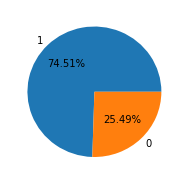

In [165]:
import matplotlib.pyplot as plt
%matplotlib inline
data_fil['ismalware'].value_counts().plot(
    kind='pie', autopct='%.2f%%', figsize=(3, 3), label='')

## K-fold - Cross Validation

In [166]:
from sklearn.model_selection import StratifiedKFold
# n_classes = df_train.device.nunique()

cv = StratifiedKFold(5, True, 1995)

print("Feautures: {}".format(len(features)))

# n_classest = df_test.device.nunique()

# print("Feautures: {}".format(len(lbp_features)))
# df_train.device.unique()

Feautures: 22


## Random-Forest

In [167]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

classifier = RandomForestClassifier(100, random_state=1995)
scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
print(scores, scores.mean())

[0.9940015  0.99125    0.9915     0.993      0.99449862] 0.9928500248562514
CPU times: user 4.89 s, sys: 5.27 ms, total: 4.9 s
Wall time: 4.9 s


In [168]:
classifier.fit(X_train,y_train)

class1 = classifier.predict(X_test)
class1.size

4000

In [194]:
# for i in class1:
#     print(class1[i], '---', y_test[i]).

In [191]:
np.count_nonzero(y_test==1), np.count_nonzero(class1==1)

(2980, 3001)